In [1]:
%%capture
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

import nltk         
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')                   

import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

import warnings

from sklearn.model_selection import train_test_split, StratifiedKFold



**Step 1. Reading in the Dataset.**

In [2]:
data = pd.read_csv("Tweets.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [3]:
data.isnull().sum() # number of nulls for each column in the dataset

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

There appears to be mulitple columns that have a large amount of null values. Although null values are not always a bad thing, the columns that have large null values are not of interest. I will now clean the dataset be creating a new dataset with only the variables of interest.

**Creating a dataset with the desired columns.**

In [4]:
data = data[['tweet_id', 'airline_sentiment', 'tweet_created', 'text', 'negativereason']]
data.head()

,tweet_id,airline_sentiment,tweet_created,text,negativereason
0,570306133677760513,neutral,2015-02-24 11:35:52 -0800,@VirginAmerica What @dhepburn said.,NaN
1,570301130888122368,positive,2015-02-24 11:15:59 -0800,@VirginAmerica plus you've added commercials t...,NaN
2,570301083672813571,neutral,2015-02-24 11:15:48 -0800,@VirginAmerica I didn't today... Must mean I n...,NaN
3,570301031407624196,negative,2015-02-24 11:15:36 -0800,@VirginAmerica it's really aggressive to blast...,Bad Flight
4,570300817074462722,negative,2015-02-24 11:14:45 -0800,@VirginAmerica and it's a really big bad thing...,Can't Tell


**Creating a Word Cloud for positive and negative words.**

In order to make this Word Cloud, I will create a new dataframe with only airline sentiment and the tweet itself. These word clouds will be able to tell us the most frequently used words for tweets that are both positive and negative.

In [5]:
df = data[['airline_sentiment', 'text']]

**Positive Word Cloud**

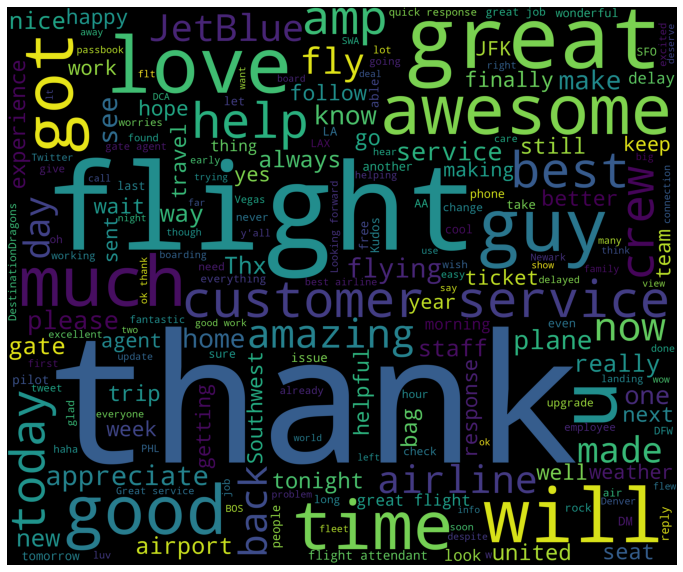

In [6]:
new_df = df[df['airline_sentiment'] == 'positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


This word cloud tells us that the most common words from "positive" tweets are 'thank', 'flight', 'good', 'awesome', 'great', and 'love'. Intuitively, this makes sense as these words tend to have a positive connotation and thereblong belong in the positive sentiment group.

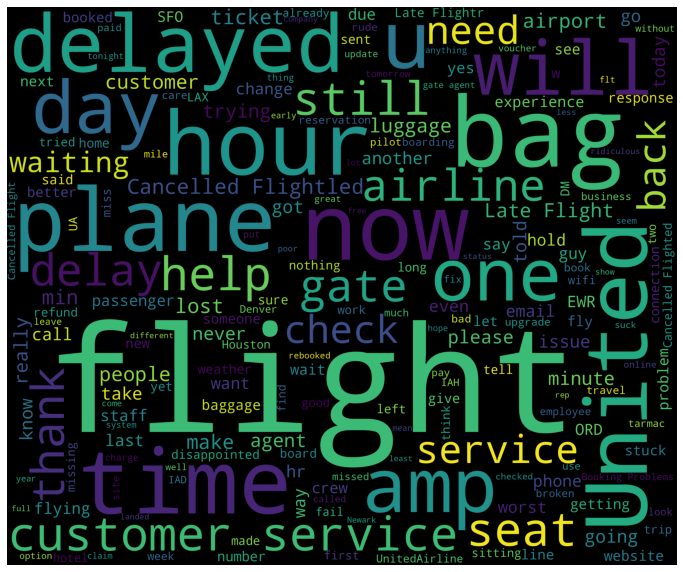

In [10]:
new_df = df[df['airline_sentiment'] == 'negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

This Word Cloud tells us that some of the most common words from "negative" tweets are 'flight', 'bag', 'delayed', 'plane', and 'United'. This Word Cloud is not as intuitive as the positive Word Cloud, but can still be interpreted and understood as negative.

**What are the main reasons for the negative tweets?**

In [17]:
print(data['negativereason'].value_counts())

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


Possible reasons for a negative tweet are: Bad Flight, Can't Tell, Late Flight, Customer Service Issue, Flight Booking Problems, Lost Luggage, Flight Attendant Complaints, Cancelled Flight, Demaged Luggage, or Long Lines. The most frequent reason for a negative tweet is **Customer Service Issue.** 

**Taking a look at the time frame of the tweets**

https://www.usatoday.com/story/todayinthesky/2015/04/13/long-tarmac-delays-at-us-airports-spiked-in-february/25702235/

In [13]:
# Cleaning the data
tweet_dates = data['tweet_created']
list(tweet_dates)

list_of_dates = []
my_dates = []

for date in tweet_dates:
  date = date.split(' ')
  list_of_dates.append(date)

for item in list_of_dates:
  my_dates.append(item[0])


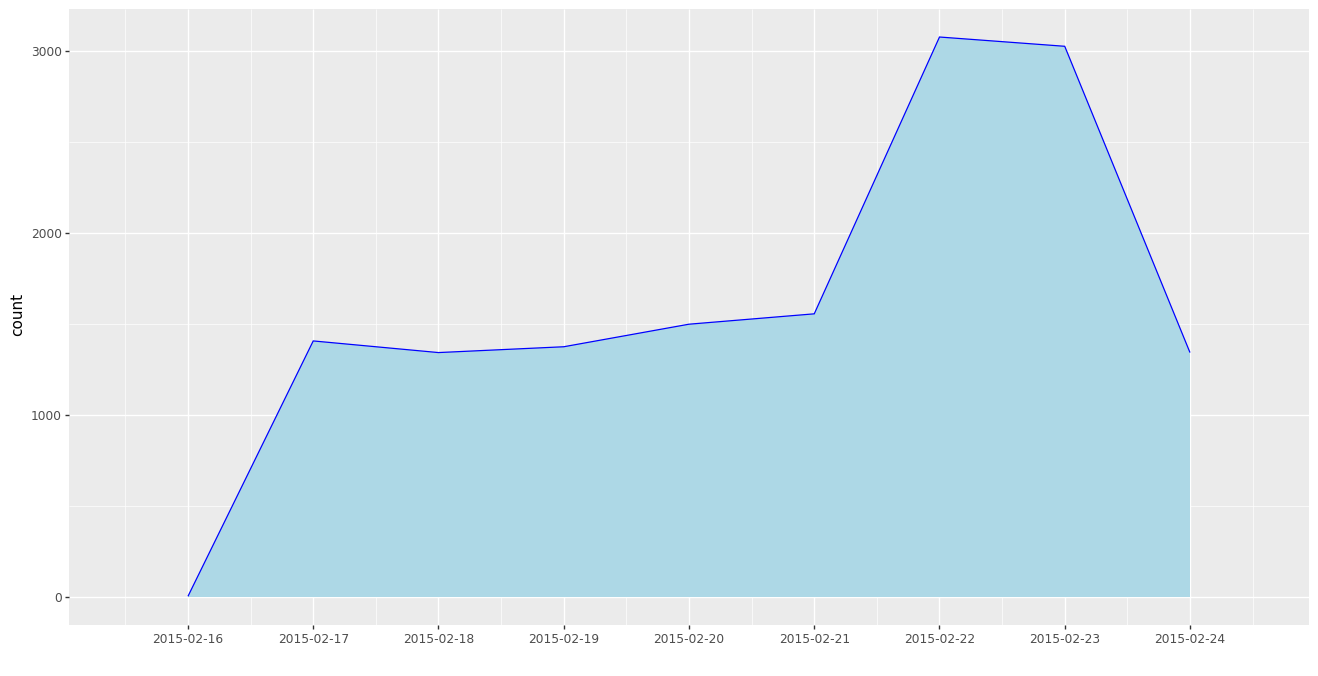

<ggplot: (8737212127543)>

In [14]:
data['my_dates'] = my_dates
data['my_dates'] = pd.to_datetime(data['my_dates'])

# ggplot of tweets over time
(ggplot(data, aes(x='my_dates')) + geom_area(stat = "bin", binwidth = 1, color ='blue', fill = 'lightblue') + theme(figure_size = (16, 8)) + labs(x = ' '))

As you can see form the area chart above, there was a spike in the number of tweets on February 22, lasting until February 24th. It is important to look at this graph using context from February 2015. According to [USA Today](https://www.usatoday.com/story/todayinthesky/2015/04/13/long-tarmac-delays-at-us-airports-spiked-in-february/25702235/), there was a significant cold front passing over the United States, more specifically the eastern US. Significant snow storms led to planes being delayed and customers unhappy with airlines services. This article also touches on how United Airlines had mistakenly posted numerous, cheap, first-class fares on their website. United, failing to honor their mistake, would be sucesptible to a large amount of backlash as customers weren't allowed on their planes. 